=== CLASIFICACIÓN: KNN Y ÁRBOLES DE DECISIÓN ===

1. ¿QUÉ ES LA CLASIFICACIÓN?
------------------------------

 OBJETIVO:
Predecir a qué categoría o clase pertenece una observación.
A diferencia de la regresión (que predice números), la clasificación
predice etiquetas o categorías.

 TIPOS DE CLASIFICACIÓN:
• Binaria: 2 clases (spam/no spam, compra/no compra)
• Multiclase: 3+ clases (bajo/medio/alto, rojo/verde/azul)

 EJEMPLOS COTIDIANOS:
• Email: ¿Es spam o no spam?
• Medicina: ¿Tumor benigno o maligno?
• Finanzas: ¿Aprobar o rechazar préstamo?
• Marketing: ¿Cliente comprará o no?
• Reconocimiento: ¿Qué animal es en la foto?

 ALGORITMOS PRINCIPALES:
• K-Nearest Neighbors (KNN): "Dime con quién andas..."
• Árboles de Decisión: Serie de preguntas sí/no
• Regresión Logística: Probabilidades de pertenencia
• Support Vector Machine: Encuentra la mejor frontera
• Random Forest: Combina múltiples árboles


2. CREAR DATASET DE CLASIFICACIÓN
-----------------------------------
Creando datase

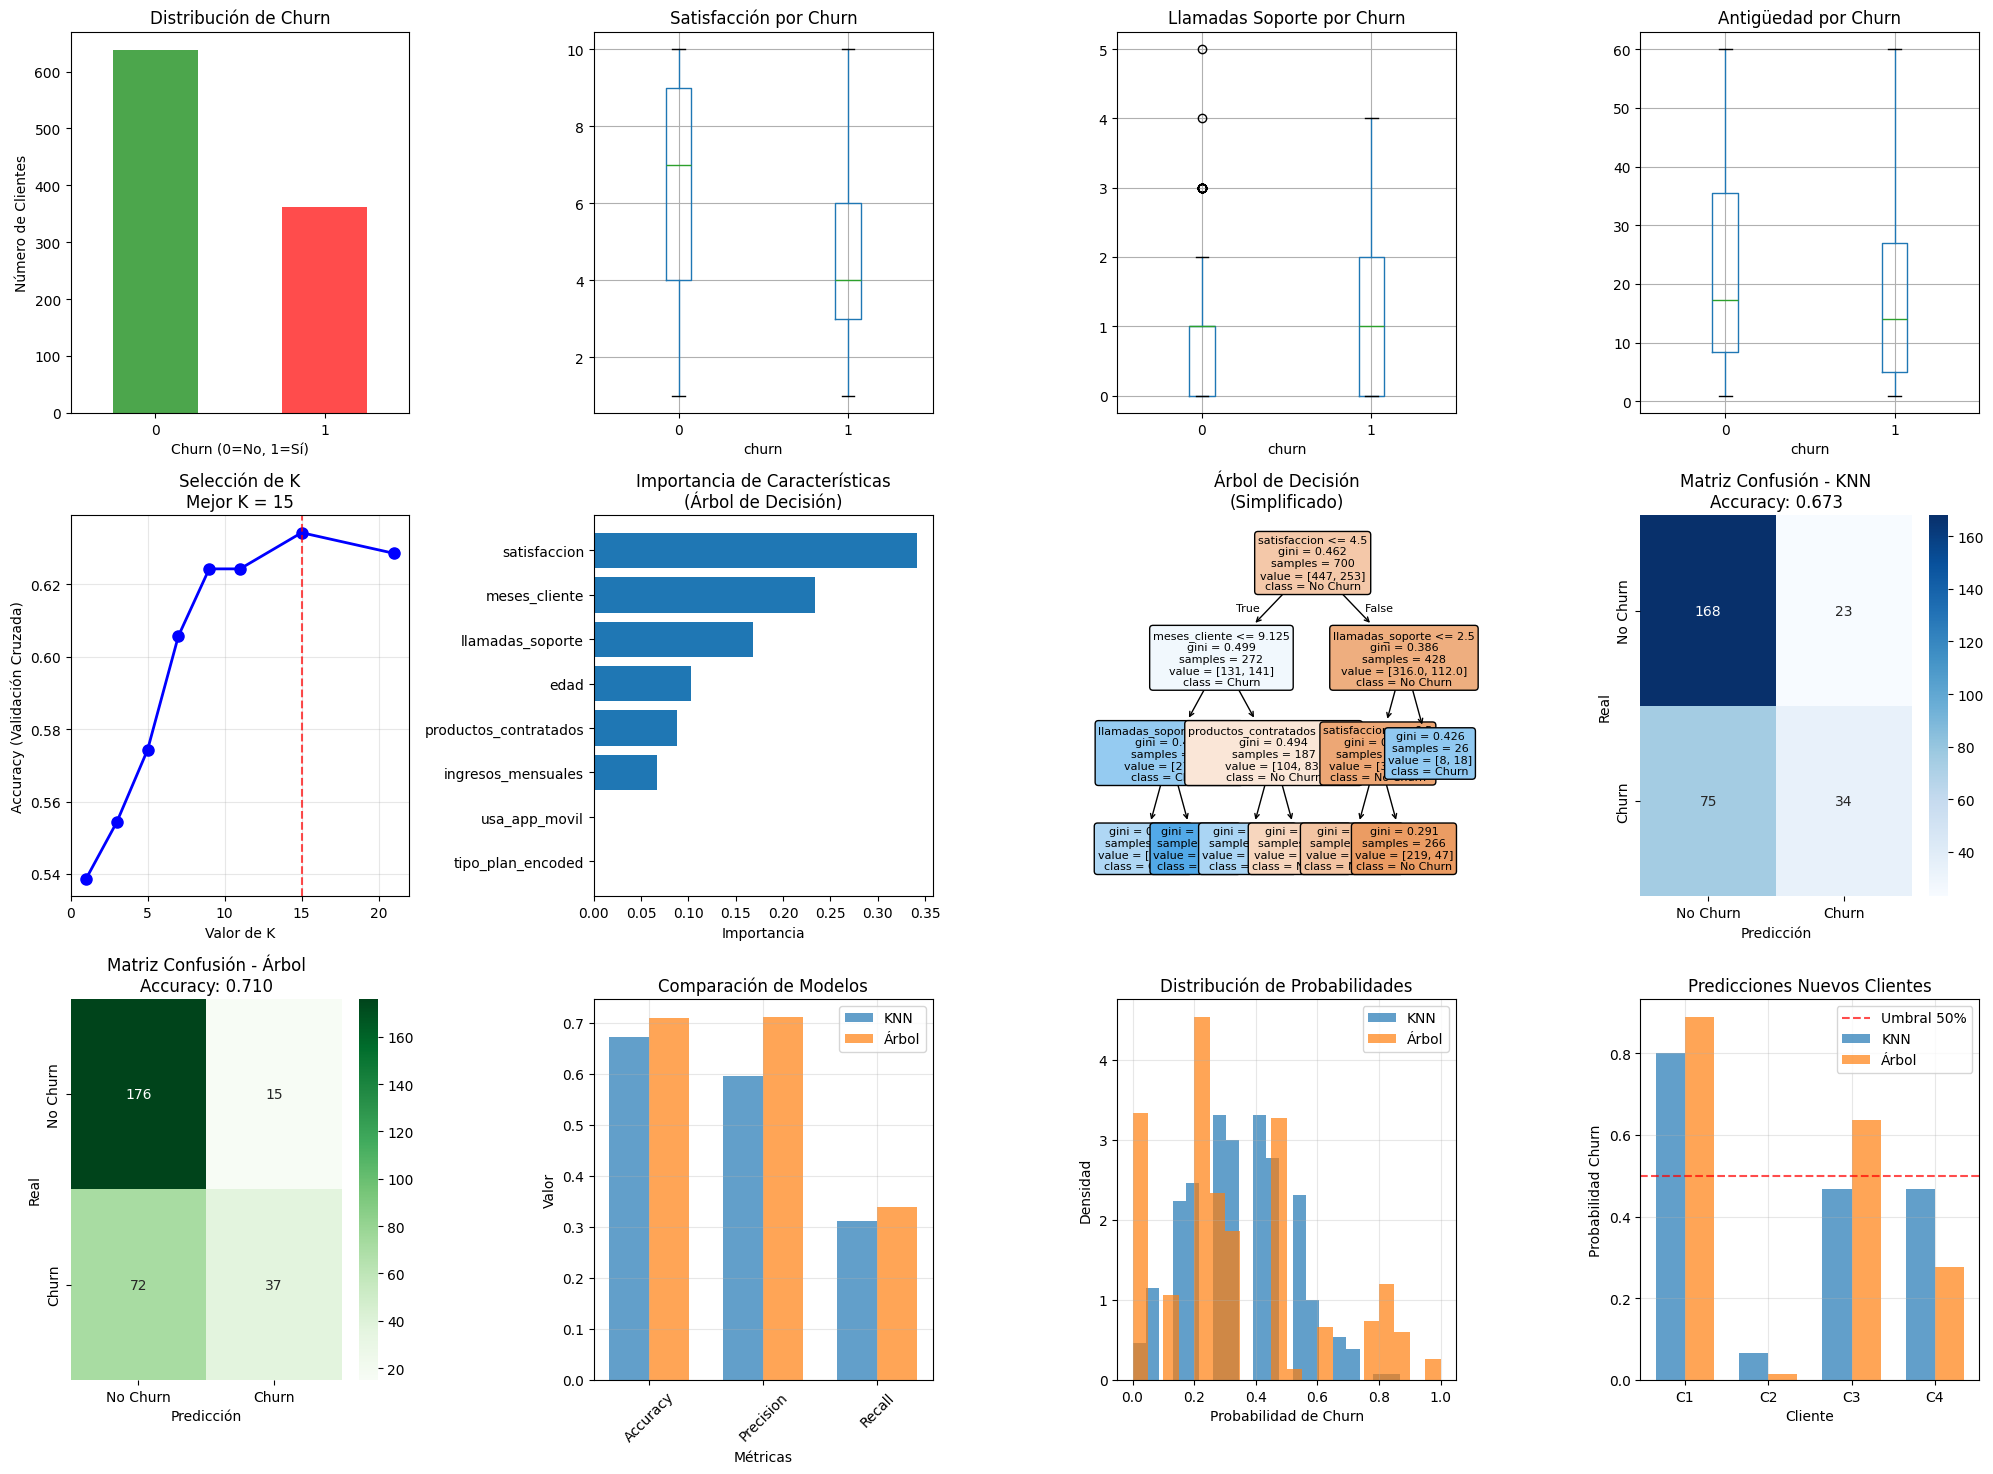


8. INTERPRETACIÓN DE RESULTADOS
------------------------------
8.1 FACTORES CLAVE DE CHURN
-------------------------
PERFIL PROMEDIO POR GRUPO:
       satisfaccion  llamadas_soporte  meses_cliente  productos_contratados  \
churn                                                                         
0              6.24              0.88          23.20                   3.11   
1              4.59              1.15          19.29                   2.82   

        edad  ingresos_mensuales  
churn                             
0      43.04             5715.48  
1      45.20             5633.40  

 INSIGHTS PRINCIPALES:
• Clientes con churn tienen satisfacción 4.6 vs 6.2
• Hacen 1.1 vs 0.9 llamadas a soporte
• Son clientes más nuevos: 19.3 vs 23.2 meses
• Tienen menos productos: 2.8 vs 3.1

8.2 RECOMENDACIONES DE NEGOCIO
------------------------------
 PREVENCIÓN DE CHURN:
  • Monitorear clientes con satisfacción < 5
  • Contactar proactivamente clientes con 3+ llamadas soporte
  • Progr

In [ ]:
"""
T3: CLASIFICACIÓN CON KNN Y ÁRBOLES DE DECISIÓN
Predicción de categorías con algoritmos supervisados
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("=== CLASIFICACIÓN: KNN Y ÁRBOLES DE DECISIÓN ===\n")

print("1. ¿QUÉ ES LA CLASIFICACIÓN?")
print("-" * 30)

print("""
 OBJETIVO:
Predecir a qué categoría o clase pertenece una observación.
A diferencia de la regresión (que predice números), la clasificación
predice etiquetas o categorías.

 TIPOS DE CLASIFICACIÓN:
• Binaria: 2 clases (spam/no spam, compra/no compra)
• Multiclase: 3+ clases (bajo/medio/alto, rojo/verde/azul)

 EJEMPLOS COTIDIANOS:
• Email: ¿Es spam o no spam?
• Medicina: ¿Tumor benigno o maligno?
• Finanzas: ¿Aprobar o rechazar préstamo?
• Marketing: ¿Cliente comprará o no?
• Reconocimiento: ¿Qué animal es en la foto?

 ALGORITMOS PRINCIPALES:
• K-Nearest Neighbors (KNN): "Dime con quién andas..."
• Árboles de Decisión: Serie de preguntas sí/no
• Regresión Logística: Probabilidades de pertenencia
• Support Vector Machine: Encuentra la mejor frontera
• Random Forest: Combina múltiples árboles
""")

print("\n2. CREAR DATASET DE CLASIFICACIÓN")
print("-" * 35)

# Crear dataset realista: predicción de churn (abandono) de clientes
np.random.seed(42)
n_customers = 1000

print("Creando dataset de CHURN de clientes...")
print("CHURN = ¿El cliente abandonará la empresa?")

# Generar características de clientes
customer_data = {
    'edad': np.random.randint(18, 70, n_customers),
    'ingresos_mensuales': np.random.lognormal(8.5, 0.5, n_customers),
    'meses_cliente': np.random.exponential(24, n_customers),
    'productos_contratados': np.random.poisson(2, n_customers) + 1,
    'llamadas_soporte': np.random.poisson(1, n_customers),
    'satisfaccion': np.random.randint(1, 11, n_customers),
    'usa_app_movil': np.random.choice([0, 1], n_customers, p=[0.3, 0.7]),
    'tipo_plan': np.random.choice(['Básico', 'Premium', 'Enterprise'],
                                 n_customers, p=[0.5, 0.3, 0.2])
}

# Limpiar datos
customer_data['ingresos_mensuales'] = np.clip(customer_data['ingresos_mensuales'], 1000, 15000)
customer_data['meses_cliente'] = np.clip(customer_data['meses_cliente'], 1, 60)
customer_data['productos_contratados'] = np.clip(customer_data['productos_contratados'], 1, 8)
customer_data['llamadas_soporte'] = np.clip(customer_data['llamadas_soporte'], 0, 10)

# Crear variable objetivo (churn) basada en lógica de negocio
churn_probability = []
for i in range(n_customers):
    # Factores que aumentan probabilidad de churn
    prob = 0.1  # probabilidad base

    # Satisfacción baja aumenta churn
    if customer_data['satisfaccion'][i] <= 3:
        prob += 0.4
    elif customer_data['satisfaccion'][i] <= 6:
        prob += 0.2

    # Muchas llamadas a soporte aumentan churn
    if customer_data['llamadas_soporte'][i] >= 3:
        prob += 0.3

    # Clientes nuevos más propensos a irse
    if customer_data['meses_cliente'][i] <= 6:
        prob += 0.2

    # Pocos productos = menos compromiso
    if customer_data['productos_contratados'][i] == 1:
        prob += 0.15

    # No usar app móvil aumenta churn
    if customer_data['usa_app_movil'][i] == 0:
        prob += 0.1

    churn_probability.append(min(prob, 0.8))  # máximo 80%

# Generar churn basado en probabilidades
customer_data['churn'] = [np.random.binomial(1, p) for p in churn_probability]

# Crear DataFrame
df_customers = pd.DataFrame(customer_data)

print(f"\n DATASET CREADO:")
print(f"• {len(df_customers)} clientes")
print(f"• {len(df_customers.columns)-1} características")
print(f"• Tasa de churn: {df_customers['churn'].mean():.1%}")

print("\nPrimeras filas:")
print(df_customers.head())

print("\nDistribución de churn:")
churn_counts = df_customers['churn'].value_counts()
print(f"• No churn (0): {churn_counts[0]} clientes ({churn_counts[0]/len(df_customers):.1%})")
print(f"• Churn (1): {churn_counts[1]} clientes ({churn_counts[1]/len(df_customers):.1%})")

# Análisis exploratorio
plt.figure(figsize=(20, 15))

# Gráfico 1: Distribución de churn
plt.subplot(3, 4, 1)
churn_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)

# Gráfico 2: Satisfacción vs Churn
plt.subplot(3, 4, 2)
df_customers.boxplot(column='satisfaccion', by='churn', ax=plt.gca())
plt.title('Satisfacción por Churn')
plt.suptitle('')  # Remover título automático

# Gráfico 3: Llamadas soporte vs Churn
plt.subplot(3, 4, 3)
df_customers.boxplot(column='llamadas_soporte', by='churn', ax=plt.gca())
plt.title('Llamadas Soporte por Churn')
plt.suptitle('')

# Gráfico 4: Meses cliente vs Churn
plt.subplot(3, 4, 4)
df_customers.boxplot(column='meses_cliente', by='churn', ax=plt.gca())
plt.title('Antigüedad por Churn')
plt.suptitle('')

print("\n3. K-NEAREST NEIGHBORS (KNN)")
print("-" * 30)

print("""
 CONCEPTO:
"Dime con quién andas y te diré quién eres"

KNN clasifica un punto basándose en las clases de sus K vecinos más cercanos.

 FUNCIONAMIENTO:
1. Calcular distancia del nuevo punto a todos los puntos de entrenamiento
2. Seleccionar los K puntos más cercanos
3. La clase más común entre esos K vecinos es la predicción

 DISTANCIA:
Generalmente se usa distancia euclidiana:
d = √[(x₁-x₂)² + (y₁-y₂)² + ...]

 PARÁMETRO K:
• K pequeño (1,3): Más sensible a ruido, fronteras complejas
• K grande (10+): Más suave, fronteras simples
• K impar evita empates en clasificación binaria

 VENTAJAS:
• Simple de entender e implementar
• No hace supuestos sobre los datos
• Funciona bien con datos no lineales

 DESVENTAJAS:
• Lento con datasets grandes
• Sensible a la escala de variables
• Requiere elegir K apropiado
""")

print("\n3.1 PREPARAR DATOS PARA KNN")
print("-" * 25)

# Preparar características numéricas
numeric_features = ['edad', 'ingresos_mensuales', 'meses_cliente',
                   'productos_contratados', 'llamadas_soporte', 'satisfaccion', 'usa_app_movil']

# Codificar variable categórica
le = LabelEncoder()
df_customers['tipo_plan_encoded'] = le.fit_transform(df_customers['tipo_plan'])

# Todas las características para el modelo
features = numeric_features + ['tipo_plan_encoded']
X = df_customers[features]
y = df_customers['churn']

print(f"Características seleccionadas: {features}")
print(f"Forma de X: {X.shape}")
print(f"Distribución de y: {y.value_counts().to_dict()}")

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print(f"\nDivisión de datos:")
print(f"• Entrenamiento: {len(X_train)} clientes")
print(f"• Prueba: {len(X_test)} clientes")

# Estandarizar características (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n ESTANDARIZACIÓN:")
print("KNN es sensible a la escala, por eso estandarizamos")
print("Ejemplo - antes de estandarizar:")
print(f"• Ingresos promedio: {X_train['ingresos_mensuales'].mean():.0f}")
print(f"• Satisfacción promedio: {X_train['satisfaccion'].mean():.1f}")
print("Después de estandarizar, ambas tienen media ≈ 0 y std ≈ 1")

print("\n3.2 ENTRENAR MODELO KNN")
print("-" * 25)

# Probar diferentes valores de K
k_values = [1, 3, 5, 7, 9, 11, 15, 21]
k_scores = []

print("Probando diferentes valores de K:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Usar validación cruzada para evaluar
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f"• K={k}: Accuracy = {scores.mean():.3f} (±{scores.std():.3f})")

# Encontrar mejor K
best_k = k_values[np.argmax(k_scores)]
print(f"\n🎯 Mejor K: {best_k} (Accuracy: {max(k_scores):.3f})")

# Gráfico 5: K vs Accuracy
plt.subplot(3, 4, 5)
plt.plot(k_values, k_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Valor de K')
plt.ylabel('Accuracy (Validación Cruzada)')
plt.title(f'Selección de K\nMejor K = {best_k}')
plt.grid(True, alpha=0.3)

# Entrenar modelo final con mejor K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_knn = knn_final.predict(X_test_scaled)
y_pred_proba_knn = knn_final.predict_proba(X_test_scaled)

# Evaluar modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\n RESULTADOS KNN (K={best_k}):")
print(f"• Accuracy en prueba: {accuracy_knn:.3f}")

print("\n4. ÁRBOLES DE DECISIÓN")
print("-" * 25)

print("""
 CONCEPTO:
Un árbol de decisión es como un diagrama de flujo que hace una serie
de preguntas sí/no para llegar a una decisión.

 FUNCIONAMIENTO:
1. Encuentra la mejor pregunta para dividir los datos
2. Divide los datos según la respuesta (sí/no)
3. Repite el proceso en cada subgrupo
4. Para hasta que se cumple un criterio de parada

 EJEMPLO DE PREGUNTAS:
• ¿Satisfacción <= 5?
  • Sí: ¿Llamadas soporte >= 2?
    • Sí: CHURN = 1 (se va)
    • No: ¿Meses cliente <= 12?
      • Sí: CHURN = 1
      • No: CHURN = 0 (se queda)
  • No: CHURN = 0

 VENTAJAS:
• Fácil de interpretar y explicar
• No requiere estandarización
• Maneja variables categóricas naturalmente
• Captura relaciones no lineales

 DESVENTAJAS:
• Propenso a sobreajuste
• Inestable (pequeños cambios → árbol diferente)
• Puede crear fronteras muy complejas
""")

print("\n4.1 ENTRENAR ÁRBOL DE DECISIÓN")
print("-" * 30)

# Entrenar árbol (sin estandarizar - no es necesario)
tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)
tree.fit(X_train, y_train)

# Hacer predicciones
y_pred_tree = tree.predict(X_test)
y_pred_proba_tree = tree.predict_proba(X_test)

# Evaluar modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f" RESULTADOS ÁRBOL DE DECISIÓN:")
print(f"• Accuracy en prueba: {accuracy_tree:.3f}")

# Importancia de características
feature_importance = pd.DataFrame({
    'Característica': features,
    'Importancia': tree.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\n IMPORTANCIA DE CARACTERÍSTICAS:")
for _, row in feature_importance.iterrows():
    print(f"• {row['Característica']}: {row['Importancia']:.3f}")

# Gráfico 6: Importancia de características
plt.subplot(3, 4, 6)
plt.barh(feature_importance['Característica'], feature_importance['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de Características\n(Árbol de Decisión)')
plt.gca().invert_yaxis()

# Gráfico 7: Visualizar árbol de decisión (simplificado)
plt.subplot(3, 4, 7)
# Crear árbol más simple para visualización
tree_simple = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=50)
tree_simple.fit(X_train, y_train)

plot_tree(tree_simple, feature_names=features, class_names=['No Churn', 'Churn'],
          filled=True, rounded=True, fontsize=8)
plt.title('Árbol de Decisión\n(Simplificado)')

print("\n5. EVALUACIÓN DETALLADA DE MODELOS")
print("-" * 35)

print("5.1 MATRICES DE CONFUSIÓN")
print("-" * 25)

# Matrices de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print("MATRIZ DE CONFUSIÓN - KNN:")
print("                Predicción")
print("              No    Sí")
print(f"Real No    {cm_knn[0,0]:4d}  {cm_knn[0,1]:4d}")
print(f"     Sí    {cm_knn[1,0]:4d}  {cm_knn[1,1]:4d}")

print("\nMATRIZ DE CONFUSIÓN - ÁRBOL:")
print("                Predicción")
print("              No    Sí")
print(f"Real No    {cm_tree[0,0]:4d}  {cm_tree[0,1]:4d}")
print(f"     Sí    {cm_tree[1,0]:4d}  {cm_tree[1,1]:4d}")

# Gráficos 8 y 9: Matrices de confusión
plt.subplot(3, 4, 8)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title(f'Matriz Confusión - KNN\nAccuracy: {accuracy_knn:.3f}')
plt.ylabel('Real')
plt.xlabel('Predicción')

plt.subplot(3, 4, 9)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title(f'Matriz Confusión - Árbol\nAccuracy: {accuracy_tree:.3f}')
plt.ylabel('Real')
plt.xlabel('Predicción')

print("\n5.2 MÉTRICAS DETALLADAS")
print("-" * 25)

# Reportes de clasificación
print("REPORTE DETALLADO - KNN:")
print(classification_report(y_test, y_pred_knn, target_names=['No Churn', 'Churn']))

print("\nREPORTE DETALLADO - ÁRBOL:")
print(classification_report(y_test, y_pred_tree, target_names=['No Churn', 'Churn']))

print("\n INTERPRETACIÓN DE MÉTRICAS:")
print("""
• PRECISION: De los que predije como churn, ¿cuántos realmente eran churn?
• RECALL: De los que realmente eran churn, ¿cuántos detecté?
• F1-SCORE: Promedio armónico de precision y recall
• SUPPORT: Número de casos reales de cada clase
""")

# Comparación de modelos
comparison_metrics = pd.DataFrame({
    'Modelo': ['KNN', 'Árbol de Decisión'],
    'Accuracy': [accuracy_knn, accuracy_tree],
    'Precision_Churn': [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_tree, output_dict=True)['1']['precision']
    ],
    'Recall_Churn': [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_tree, output_dict=True)['1']['recall']
    ]
})

print("\n COMPARACIÓN DE MODELOS:")
print(comparison_metrics.round(3))

# Determinar mejor modelo
if accuracy_knn > accuracy_tree:
    mejor_modelo = "KNN"
    mejor_accuracy = accuracy_knn
else:
    mejor_modelo = "Árbol de Decisión"
    mejor_accuracy = accuracy_tree

print(f"\n MEJOR MODELO: {mejor_modelo} (Accuracy: {mejor_accuracy:.3f})")

# Gráfico 10: Comparación de métricas
plt.subplot(3, 4, 10)
metrics_to_plot = ['Accuracy', 'Precision_Churn', 'Recall_Churn']
x_pos = np.arange(len(metrics_to_plot))
knn_values = [comparison_metrics.iloc[0][metric] for metric in metrics_to_plot]
tree_values = [comparison_metrics.iloc[1][metric] for metric in metrics_to_plot]

width = 0.35
plt.bar(x_pos - width/2, knn_values, width, label='KNN', alpha=0.7)
plt.bar(x_pos + width/2, tree_values, width, label='Árbol', alpha=0.7)
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de Modelos')
plt.xticks(x_pos, ['Accuracy', 'Precision', 'Recall'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

print("\n6. ANÁLISIS DE PROBABILIDADES")
print("-" * 30)

# Análisis de probabilidades predichas
print("6.1 DISTRIBUCIÓN DE PROBABILIDADES")
print("-" * 35)

# Obtener probabilidades de churn (clase 1)
prob_churn_knn = y_pred_proba_knn[:, 1]
prob_churn_tree = y_pred_proba_tree[:, 1]

print(f"KNN - Probabilidades de churn:")
print(f"• Mínima: {prob_churn_knn.min():.3f}")
print(f"• Máxima: {prob_churn_knn.max():.3f}")
print(f"• Promedio: {prob_churn_knn.mean():.3f}")

print(f"\nÁrbol - Probabilidades de churn:")
print(f"• Mínima: {prob_churn_tree.min():.3f}")
print(f"• Máxima: {prob_churn_tree.max():.3f}")
print(f"• Promedio: {prob_churn_tree.mean():.3f}")

# Gráfico 11: Distribución de probabilidades
plt.subplot(3, 4, 11)
plt.hist(prob_churn_knn, bins=20, alpha=0.7, label='KNN', density=True)
plt.hist(prob_churn_tree, bins=20, alpha=0.7, label='Árbol', density=True)
plt.xlabel('Probabilidad de Churn')
plt.ylabel('Densidad')
plt.title('Distribución de Probabilidades')
plt.legend()
plt.grid(True, alpha=0.3)

print("\n6.2 CLIENTES DE ALTO RIESGO")
print("-" * 25)

# Identificar clientes de alto riesgo
umbral_riesgo = 0.7
clientes_alto_riesgo_knn = np.sum(prob_churn_knn > umbral_riesgo)
clientes_alto_riesgo_tree = np.sum(prob_churn_tree > umbral_riesgo)

print(f"Clientes con probabilidad > {umbral_riesgo}:")
print(f"• KNN: {clientes_alto_riesgo_knn} clientes ({clientes_alto_riesgo_knn/len(y_test):.1%})")
print(f"• Árbol: {clientes_alto_riesgo_tree} clientes ({clientes_alto_riesgo_tree/len(y_test):.1%})")

# Crear DataFrame con resultados para análisis
resultados_df = pd.DataFrame({
    'cliente_id': range(len(y_test)),
    'churn_real': y_test.values,
    'prob_churn_knn': prob_churn_knn,
    'pred_knn': y_pred_knn,
    'prob_churn_tree': prob_churn_tree,
    'pred_tree': y_pred_tree
})

# Top 10 clientes con mayor riesgo según KNN
top_riesgo = resultados_df.nlargest(10, 'prob_churn_knn')
print(f"\nTOP 10 CLIENTES DE MAYOR RIESGO (KNN):")
print(top_riesgo[['cliente_id', 'churn_real', 'prob_churn_knn', 'prob_churn_tree']].round(3))

print("\n7. PREDICCIÓN DE NUEVOS CLIENTES")
print("-" * 35)

# Crear ejemplos de nuevos clientes
nuevos_clientes = pd.DataFrame({
    'edad': [25, 45, 35, 60],
    'ingresos_mensuales': [3000, 8000, 5000, 12000],
    'meses_cliente': [2, 36, 18, 48],
    'productos_contratados': [1, 4, 2, 3],
    'llamadas_soporte': [5, 0, 2, 1],
    'satisfaccion': [3, 9, 6, 8],
    'usa_app_movil': [0, 1, 1, 0],
    'tipo_plan': ['Básico', 'Premium', 'Básico', 'Enterprise']
})

print("NUEVOS CLIENTES PARA PREDECIR:")
print(nuevos_clientes)

# Preparar datos de nuevos clientes
nuevos_clientes['tipo_plan_encoded'] = le.transform(nuevos_clientes['tipo_plan'])
X_nuevos = nuevos_clientes[features]
X_nuevos_scaled = scaler.transform(X_nuevos)

# Hacer predicciones
pred_knn_nuevos = knn_final.predict(X_nuevos_scaled)
prob_knn_nuevos = knn_final.predict_proba(X_nuevos_scaled)[:, 1]

pred_tree_nuevos = tree.predict(X_nuevos)
prob_tree_nuevos = tree.predict_proba(X_nuevos)[:, 1]

print(f"\n PREDICCIONES PARA NUEVOS CLIENTES:")
for i in range(len(nuevos_clientes)):
    print(f"\nCliente {i+1}:")
    print(f"  • KNN: {'CHURN' if pred_knn_nuevos[i] else 'NO CHURN'} (prob: {prob_knn_nuevos[i]:.3f})")
    print(f"  • Árbol: {'CHURN' if pred_tree_nuevos[i] else 'NO CHURN'} (prob: {prob_tree_nuevos[i]:.3f})")

    # Interpretación
    if prob_knn_nuevos[i] > 0.7:
        print(f"  •  ALTO RIESGO - Requiere atención inmediata")
    elif prob_knn_nuevos[i] > 0.5:
        print(f"  •  RIESGO MEDIO - Monitorear de cerca")
    else:
        print(f"  •  BAJO RIESGO - Cliente estable")

# Gráfico 12: Predicciones nuevos clientes
plt.subplot(3, 4, 12)
x_pos = np.arange(len(nuevos_clientes))
width = 0.35
plt.bar(x_pos - width/2, prob_knn_nuevos, width, label='KNN', alpha=0.7)
plt.bar(x_pos + width/2, prob_tree_nuevos, width, label='Árbol', alpha=0.7)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Umbral 50%')
plt.xlabel('Cliente')
plt.ylabel('Probabilidad Churn')
plt.title('Predicciones Nuevos Clientes')
plt.xticks(x_pos, [f'C{i+1}' for i in range(len(nuevos_clientes))])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n8. INTERPRETACIÓN DE RESULTADOS")
print("-" * 30)

print("8.1 FACTORES CLAVE DE CHURN")
print("-" * 25)

# Análizar características de clientes con churn
churn_analysis = df_customers.groupby('churn').agg({
    'satisfaccion': 'mean',
    'llamadas_soporte': 'mean',
    'meses_cliente': 'mean',
    'productos_contratados': 'mean',
    'edad': 'mean',
    'ingresos_mensuales': 'mean'
}).round(2)

print("PERFIL PROMEDIO POR GRUPO:")
print(churn_analysis)

print(f"\n INSIGHTS PRINCIPALES:")
insights = [
    f"• Clientes con churn tienen satisfacción {churn_analysis.loc[1, 'satisfaccion']:.1f} vs {churn_analysis.loc[0, 'satisfaccion']:.1f}",
    f"• Hacen {churn_analysis.loc[1, 'llamadas_soporte']:.1f} vs {churn_analysis.loc[0, 'llamadas_soporte']:.1f} llamadas a soporte",
    f"• Son clientes más nuevos: {churn_analysis.loc[1, 'meses_cliente']:.1f} vs {churn_analysis.loc[0, 'meses_cliente']:.1f} meses",
    f"• Tienen menos productos: {churn_analysis.loc[1, 'productos_contratados']:.1f} vs {churn_analysis.loc[0, 'productos_contratados']:.1f}",
]

for insight in insights:
    print(insight)

print("\n8.2 RECOMENDACIONES DE NEGOCIO")
print("-" * 30)

recommendations = [
    " PREVENCIÓN DE CHURN:",
    "  • Monitorear clientes con satisfacción < 5",
    "  • Contactar proactivamente clientes con 3+ llamadas soporte",
    "  • Programas de retención para clientes nuevos (< 6 meses)",
    "  • Incentivar contratación de productos adicionales",
    "",
    " SEGMENTACIÓN:",
    "  • Alto riesgo: prob > 70% → Intervención inmediata",
    "  • Medio riesgo: prob 50-70% → Monitoreo cercano",
    "  • Bajo riesgo: prob < 50% → Mantenimiento regular",
    "",
    " ACCIONES ESPECÍFICAS:",
    "  • Mejorar experiencia de soporte técnico",
    "  • Programas de onboarding para nuevos clientes",
    "  • Encuestas de satisfacción regulares",
    "  • Ofertas personalizadas por segmento"
]

for rec in recommendations:
    print(rec)

print("\n9. COMPARACIÓN FINAL DE ALGORITMOS")
print("-" * 35)

print("9.1 CUÁNDO USAR CADA ALGORITMO")
print("-" * 30)

algorithm_comparison = {
    "K-NEAREST NEIGHBORS (KNN)": {
        " Usar cuando:": [
            "• Datos con patrones locales complejos",
            "• No hay supuestos sobre distribución de datos",
            "• Dataset pequeño-mediano (< 10,000 registros)",
            "• Fronteras de decisión no lineales",
            "• Necesitas probabilidades suaves"
        ],
        " Evitar cuando:": [
            "• Dataset muy grande (lento)",
            "• Muchas dimensiones (maldición dimensionalidad)",
            "• Variables con escalas muy diferentes",
            "• Necesitas interpretabilidad del modelo"
        ]
    },
    "ÁRBOLES DE DECISIÓN": {
        " Usar cuando:": [
            "• Necesitas interpretabilidad total",
            "• Variables categóricas y numéricas mezcladas",
            "• Relaciones no lineales complejas",
            "• Necesitas reglas de negocio claras",
            "• Datos con valores faltantes"
        ],
        " Evitar cuando:": [
            "• Propenso a sobreajuste",
            "• Datos con mucho ruido",
            "• Relaciones lineales simples",
            "• Necesitas máxima precisión"
        ]
    }
}

for algorithm, details in algorithm_comparison.items():
    print(f"\n{algorithm}:")
    for category, points in details.items():
        print(f"  {category}")
        for point in points:
            print(f"    {point}")

print("\n9.2 RESUMEN DE RESULTADOS")
print("-" * 25)

final_summary = f"""
 RESULTADOS FINALES:
• KNN (K={best_k}): Accuracy = {accuracy_knn:.3f}
• Árbol de Decisión: Accuracy = {accuracy_tree:.3f}
• Mejor modelo: {mejor_modelo}

🔍 CARACTERÍSTICAS MÁS IMPORTANTES:
"""

print(final_summary)

# Mostrar top 3 características más importantes del árbol
top_features = feature_importance.head(3)
for _, row in top_features.iterrows():
    print(f"  • {row['Característica']}: {row['Importancia']:.3f}")

print(f"""
 APLICACIÓN PRÁCTICA:
• {clientes_alto_riesgo_knn} clientes identificados como alto riesgo
• Tasa de churn actual: {df_customers['churn'].mean():.1%}
• Potencial ahorro: Retener clientes de alto valor

 PRÓXIMOS PASOS:
• Implementar modelo en producción
• Monitorear desempeño mensualmente
• Reentrenar con nuevos datos
• A/B testing de estrategias de retención
""")

print("\n" + "="*50)
print("¡CLASIFICACIÓN CON KNN Y ÁRBOLES COMPLETADA!")
print("="*50)

# Guardar modelos y datos
import joblib
joblib.dump(knn_final, 'modelo_knn_churn.pkl')
joblib.dump(tree, 'modelo_arbol_churn.pkl')
joblib.dump(scaler, 'scaler_churn.pkl')
df_customers.to_csv('datos_churn_clientes.csv', index=False)

print(f"\n ARCHIVOS GUARDADOS:")
files_saved = [
    "• modelo_knn_churn.pkl",
    "• modelo_arbol_churn.pkl",
    "• scaler_churn.pkl",
    "• datos_churn_clientes.csv"
]

for file in files_saved:
    print(file)

print(f"\n LO QUE HAS APRENDIDO:")
learning_points = [
    "✓ Diferencia entre regresión y clasificación",
    "✓ Funcionamiento de KNN y selección de K",
    "✓ Interpretación de árboles de decisión",
    "✓ Importancia de estandarización en KNN",
    "✓ Evaluación con matrices de confusión",
    "✓ Métricas: accuracy, precision, recall, F1",
    "✓ Análisis de probabilidades predichas",
    "✓ Aplicación práctica en predicción de churn",
    "✓ Interpretación de resultados para negocio"
]

for point in learning_points:
    print(f"  {point}")

print("\n¡Ahora estás listo para el siguiente tema: Evaluación avanzada de modelos!")